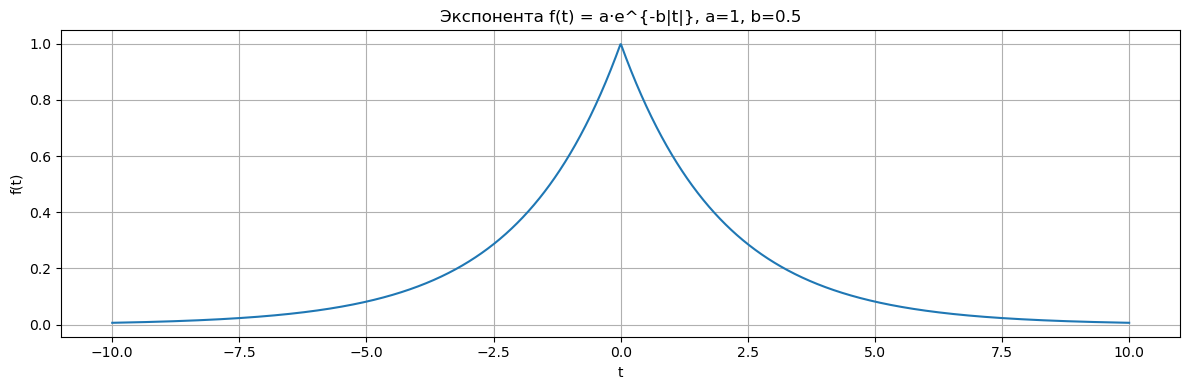

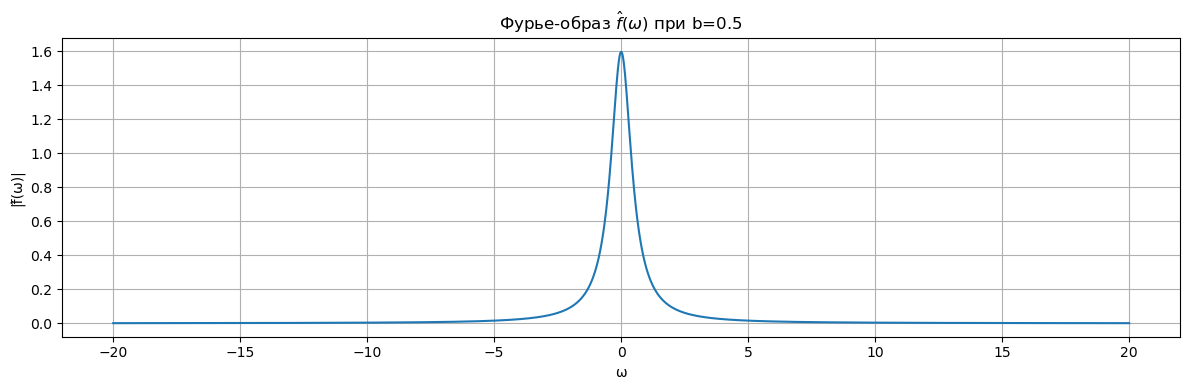

a = 1, b = 0.5
Интеграл |f(t)|^2 dt = 1.9999
Интеграл |f̂(ω)|^2 dω = 2.0000
Разность = 8.5889e-05
----------------------------------------


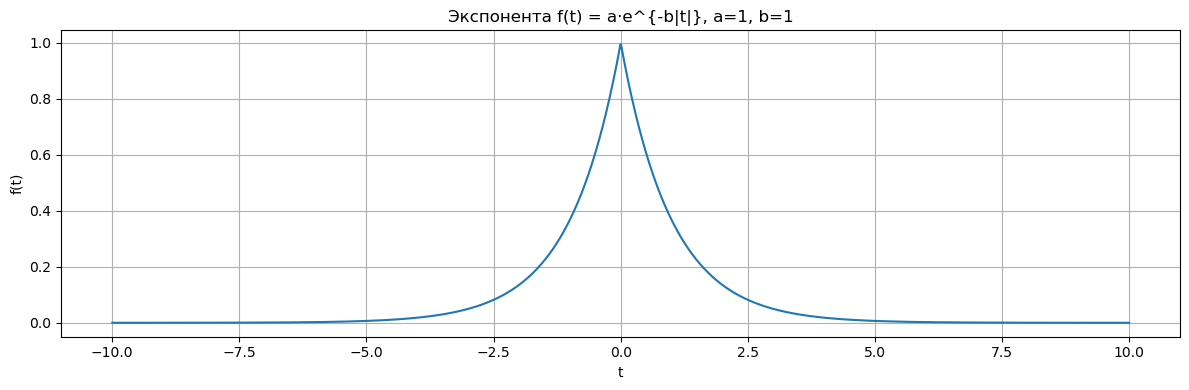

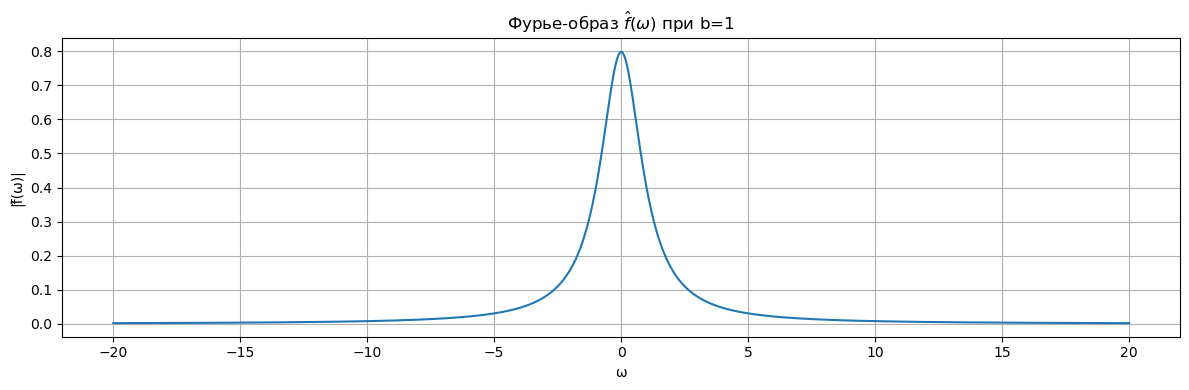

a = 1, b = 1
Интеграл |f(t)|^2 dt = 1.0000
Интеграл |f̂(ω)|^2 dω = 0.9999
Разность = 3.6208e-05
----------------------------------------


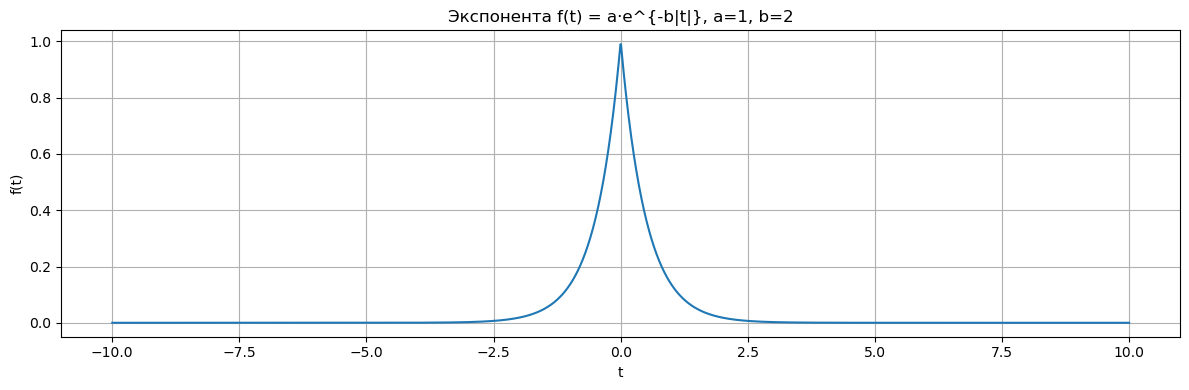

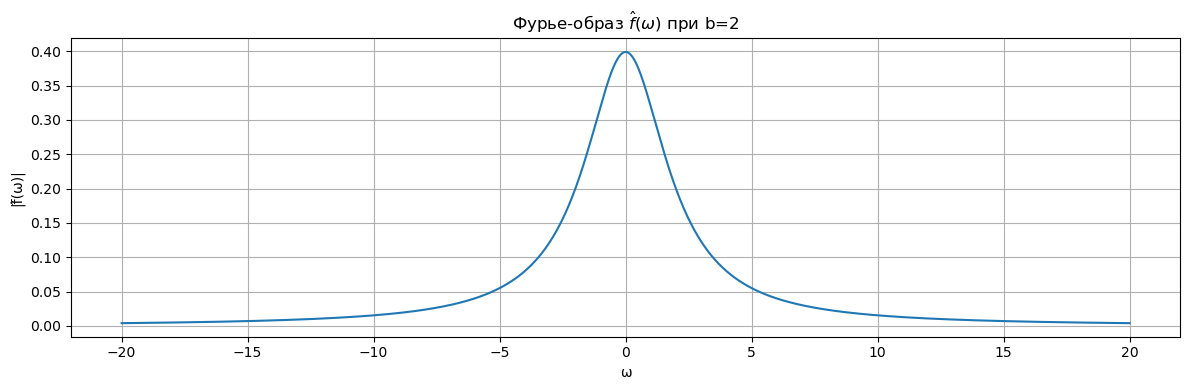

a = 1, b = 2
Интеграл |f(t)|^2 dt = 0.5000
Интеграл |f̂(ω)|^2 dω = 0.4998
Разность = 1.7632e-04
----------------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

def exp_decay(t, a=1, b=1):
    return a * np.exp(-b * np.abs(t))

def fourier_transform_exp(omega, a=1, b=1):
    return (2 * a * b) / (np.sqrt(2 * np.pi) * (b**2 + omega**2))

a = 1
b_values = [0.5, 1, 2]

t = np.linspace(-10, 10, 2000)
omega = np.linspace(-20, 20, 2000)

for b in b_values:
    f_t = exp_decay(t, a, b)
    f_omega = fourier_transform_exp(omega, a, b)

    # f(t)
    plt.figure(figsize=(12, 4))
    plt.plot(t, f_t)
    plt.title(f"Экспонента f(t) = a·e^{{-b|t|}}, a={a}, b={b}")
    plt.xlabel("t")
    plt.ylabel("f(t)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"exp_function_b{b}.png")
    plt.show()

    # f^(ω)
    plt.figure(figsize=(12, 4))
    plt.plot(omega, f_omega)
    plt.title(f"Фурье-образ $\\hat{{f}}(\\omega)$ при b={b}")
    plt.xlabel("ω")
    plt.ylabel("|f̂(ω)|")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"exp_spectrum_b{b}.png")
    plt.show()

    # Парсеваль
    lhs = simps(np.abs(f_t)**2, t)
    rhs = simps(np.abs(f_omega)**2, omega)
    print(f"a = {a}, b = {b}")
    print(f"Интеграл |f(t)|^2 dt = {lhs:.4f}")
    print(f"Интеграл |f̂(ω)|^2 dω = {rhs:.4f}")
    print(f"Разность = {abs(lhs - rhs):.4e}")
    print("-" * 40)
